In [83]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [84]:
df = pd.read_csv("insurance.csv")

In [85]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [86]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


DATA CLEANING AND PREPRATION:--

CHECK THE MISING VALUES :-

In [87]:
print("Missing values in each column:\n")
print(df.isnull().sum())

Missing values in each column:

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
label_encoder = LabelEncoder()

df['sex'] = label_encoder.fit_transform(df['sex'])       
df['smoker'] = label_encoder.fit_transform(df['smoker']) 
df['region'] = label_encoder.fit_transform(df['region'])

In [89]:
print("\nData types after encoding:\n")
print(df.dtypes)

print("\nFirst 5 rows of cleaned data:\n")
print(df.head())


Data types after encoding:

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

First 5 rows of cleaned data:

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


EDA :-

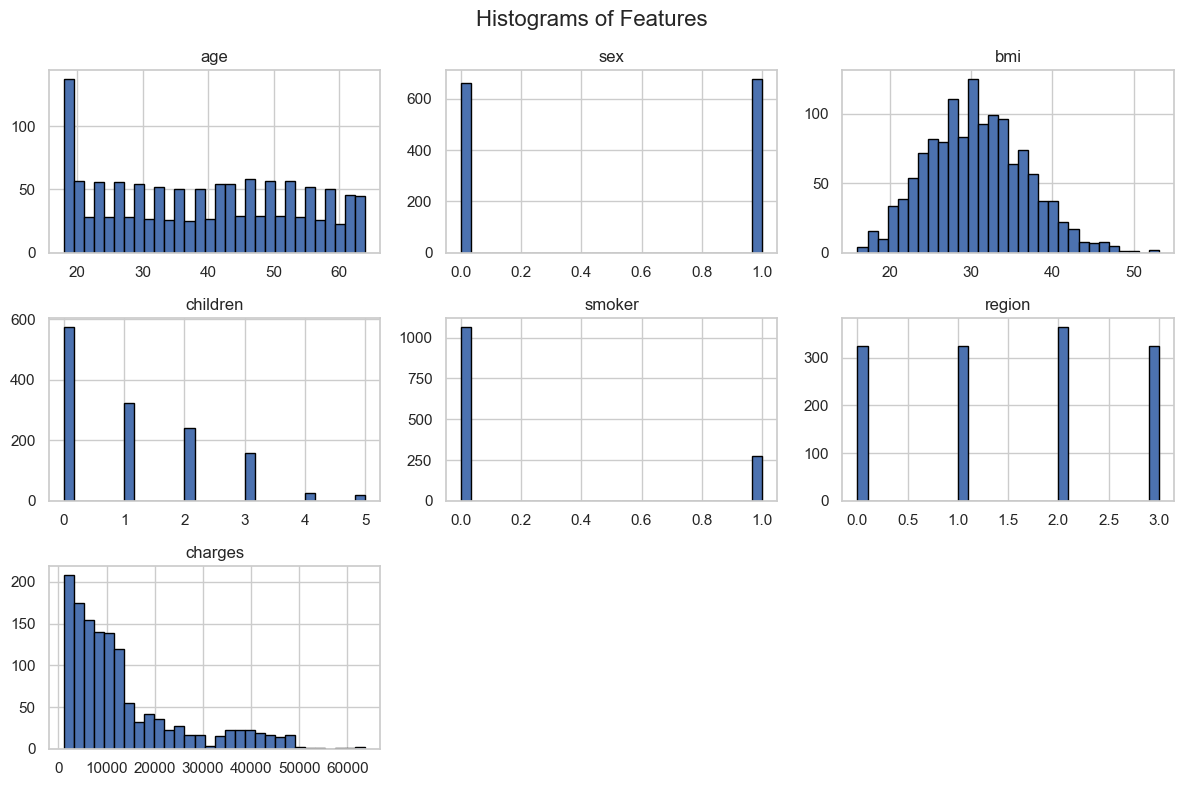

In [90]:
df.hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle('Histograms of Features', fontsize=16)
plt.tight_layout()
plt.show()

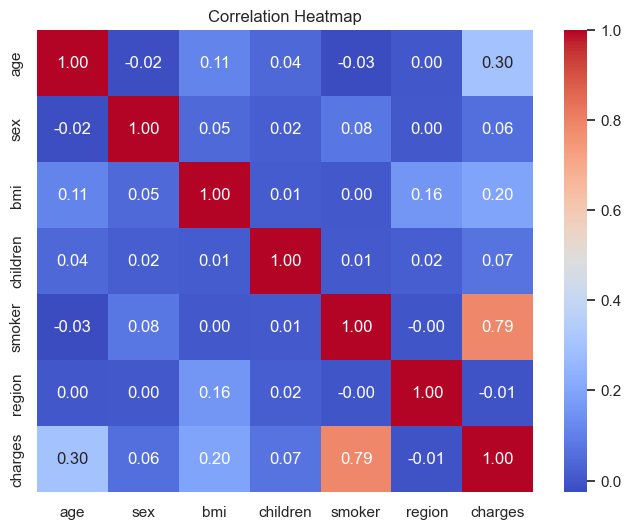

In [91]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

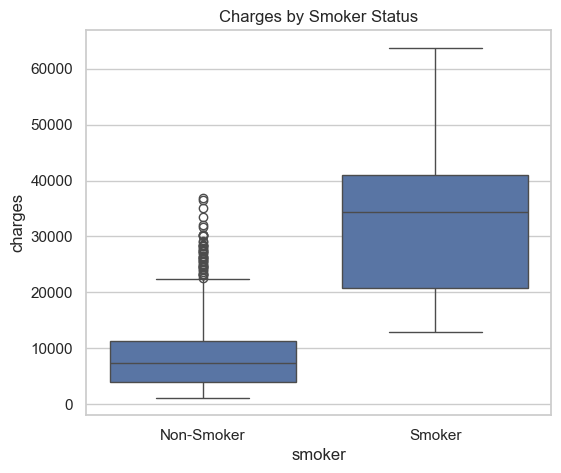

In [92]:
plt.figure(figsize=(6, 5))
sns.boxplot(x="smoker", y="charges", data=df)
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.title("Charges by Smoker Status")
plt.show()


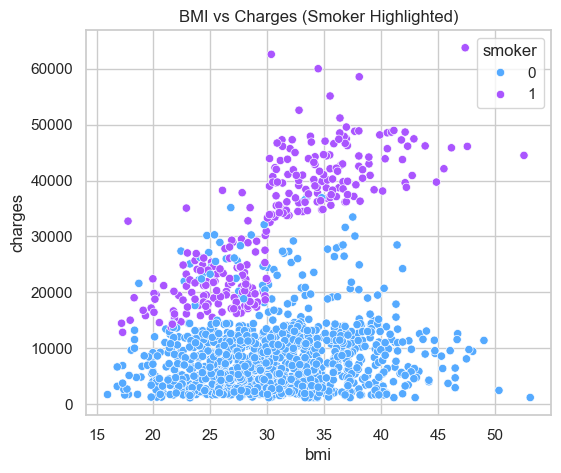

In [93]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, palette='cool')
plt.title("BMI vs Charges (Smoker Highlighted)")
plt.show()

TEST TRAIN SPLIT:--

In [94]:
X = df.drop('charges', axis=1)  
y = df['charges']              


In [95]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [96]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (1070, 6)
Test set shape: (268, 6)


MODEL TRANNING (LINEAR REGRESSION)

In [97]:
model =  LinearRegression()



In [98]:
model.fit(X_train, y_train)

LinearRegression()

In [99]:
y_pred = model.predict(X_test)

In [100]:
print("Model Intercept:", model.intercept_)
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

Model Intercept: -11946.606567263034
Model Coefficients:
age: 257.0563
sex: -18.7915
bmi: 335.7815
children: 425.0915
smoker: 23647.8181
region: -271.2843


MODEL EVELUATION:--

In [101]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [102]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [103]:
print("Model Evaluation Results:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Model Evaluation Results:
R² Score: 0.7833
Mean Absolute Error (MAE): 4186.51
Mean Squared Error (MSE): 33635210.43
Root Mean Squared Error (RMSE): 5799.59


PRIDECT NEW SAMPLE:--

In [104]:
new_sample = pd.DataFrame([{
    'age': 30,
    'sex': 0,        # female
    'bmi': 28.5,
    'children': 1,
    'smoker': 1,     # yes
    'region': 2      # southeast
}])

In [105]:
predicted_charge = model.predict(new_sample)

In [106]:
print(f"Predicted medical insurance charge: ₹{predicted_charge[0]:,.2f}")

Predicted medical insurance charge: ₹28,865.19


CONCLUSION:--

In this project, we successfully built a machine learning model using Linear Regression to predict medical insurance charges based on several personal and lifestyle factors such as:

Age

Sex

BMI (Body Mass Index)

Number of children

Smoking status

Residential region

Smoker status had a significant impact on insurance charges — smokers paid noticeably higher.

BMI and age also showed a strong positive correlation with the cost.

Linear Regression provided a reasonable fit with an R² score indicating that the model could explain a good proportion of the variance in the data.



 Model Performance:
R² Score: Measures how well the model explains the variation in charges.

MAE / RMSE: Indicate how far off predictions are from actual values on average.

While Linear Regression offers a good baseline model, more advanced models like Random Forest or Gradient Boosting may improve accuracy further.

